In [1]:
import os
os.chdir("../")

In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
import json
import cv2
from preprocessing.preprocess import preprocess
from IPython.display import Image

import PIL.Image

from structure_parser.formstructureparser import FormStructureParser
from field_recognizer.recognize_all import recognize

In [4]:
image_path = "test/example_forms/julinka_dotaznik/front_page.jpg"
with open("test/example_forms/julinka_dotaznik/front_page_config.json", 'r') as f:
    config = json.load(f) 

In [7]:
fsp = FormStructureParser(config)

img = preprocess(image_path, config)
form_data = fsp.process_form(img)
form_data = recognize(form_data)

True with accuracy 0.9


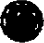

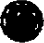

(43, 44)
False with accuracy 0.9


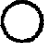

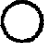

(43, 44)
False with accuracy 0.9


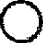

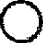

(43, 43)
False with accuracy 0.9


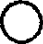

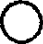

(44, 43)
c with accuracy 0.5


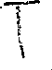

(36, 20)
c with accuracy 0.5


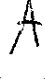

(41, 15)
c with accuracy 0.5


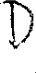

(43, 13)
c with accuracy 0.5


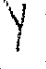

(38, 18)
 with accuracy 1.0


(1, 1)
c with accuracy 0.5


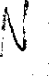

(38, 18)
c with accuracy 0.5


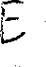

(37, 19)
c with accuracy 0.5


(34, 22)
c with accuracy 0.5


(49, 7)
c with accuracy 0.5


(7, 49)
c with accuracy 0.5


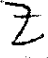

(33, 23)
c with accuracy 0.5


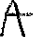

(32, 24)
c with accuracy 0.5


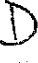

(40, 16)
c with accuracy 0.5


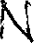

(34, 22)
c with accuracy 0.5


(43, 13)
 with accuracy 1.0


(1, 1)
c with accuracy 0.5


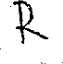

(29, 27)
c with accuracy 0.5


(42, 14)
c with accuracy 0.5


(43, 13)
 with accuracy 1.0


(1, 47)
c with accuracy 0.5


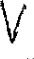

(40, 16)
c with accuracy 0.5


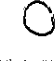

(31, 25)
c with accuracy 0.5


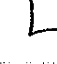

(32, 24)
c with accuracy 0.5


(35, 21)
c with accuracy 0.5


(46, 10)


In [9]:
l=[]

for field in form_data["fields"]:
    for img, val, acc, new_img in list(zip(field["box_data"],
                                   field["recognized"],
                                   field["accuracy"],
                                   field["box_data_transf"])):
        print(f"{val} with accuracy {acc}")
        display(PIL.Image.fromarray(img))
        display(PIL.Image.fromarray(new_img))
        print(new_img.shape)
        if field["type"]=="letters":
            l.append(new_img)

In [10]:
import pickle
with open("./test/example_forms/julinka_dotaznik/example_letters.pickle", "wb") as fp:   #Pickling
    pickle.dump(l, fp)
    with open("./test/example_forms/julinka_dotaznik/example_letters.pickle", "rb") as fp:   # Unpickling
        b = pickle.load(fp)
b

[array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255, 255, 255, 255],
        [255, 247,  58,  58,  58,  58,  58,  58,  58,  60,   8,   0,   0,
           0,   0,   0, 255, 255, 255, 255],
        [255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   2,
           0,   5,  47, 255, 255, 255, 255],
        [ 36,  50,  49,  37,  59, 185,  16,  14, 231, 214, 214, 255, 255,
         255, 255, 255, 255, 255, 255, 255],
        [ 36, 255, 255, 255, 255, 252,   0,   7, 255, 255, 255, 255, 255,
         255, 255, 255, 255, 255, 255, 255],
        [255, 255, 255, 255, 255, 255,  22,   0,